### Peak Signal-to-Noise Ratio (PSNR) and Structural Similarity (SSIM) Metrics calculation


- 2x (256x256-> 512x512)
- 4x (128x128 -> 512x512)


In [3]:
import os, shutil 
from PIL import Image 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm import tqdm


In [4]:
from piqa import PSNR, SSIM
import torchvision.transforms as transforms
convert_tensor = transforms.ToTensor()

#### Define function to calculate PSNR

In [5]:
#ls = os.listdir('4x_original/')
values_swinir= []

def folder_psnr(original_folder="original/", method="swinir",res="4x"):
    """
    Calculates Peak Signal To Noise (PSNR) Ratio between two folders (original and method)

    Parameters
    ----------
    original_folder : str
        Folder containing the original images
    method : str
        method of super-resolution applied to images
    res : str
        Super-resolution operation of the images
        SR image folder MUST BE named as: res_method (e.g. 4x_swinir)
    Returns
    -------
    psnr_values : list
        List of PSNR values
    mean_psnr : float
        Mean PSNR value

    """

    original_folder = original_folder
    ls = os.listdir(original_folder)

    values_psnr = []

    for i in ls:
        if int(i[:-4]) <= 2151 and int(i[:-4]) >= 2050:
            X = Image.open(f"{original_folder}/{i}")
            X = convert_tensor(X)
            Y = Image.open(f"result_images/{method}_{res}/{i}")
            Y = convert_tensor(Y)
            psnr = PSNR()
            value = psnr(X, Y)
            values_psnr.append(float(value))  

    mean_psnr = np.mean(values_psnr)

    return values_psnr, mean_psnr



#### Calculate PSNR metric for 4x upscaling 

In [7]:
values_swinir, mean_swinir = folder_psnr(method="swinir")
values_nearest, mean_nearest = folder_psnr(method="nearest")
values_bilinear, mean_bilinear = folder_psnr(method="bilinear")
values_bicubic, mean_bicubic = folder_psnr(method="bicubic")
values_lanczos, mean_lanczos = folder_psnr(method="lanczos")
values_rcanit, mean_rcanit = folder_psnr(method="rcanit")


print(mean_swinir)
print(mean_nearest)
print(mean_bilinear)
print(mean_bicubic)
print(mean_lanczos)
print(mean_rcanit)

25.451374128753063
22.297405242919922
23.48898910073673
24.1478775248808
24.426744199266622
25.307925093407725


#### Calculate PSNR Metrics for 2x Upscaling

In [8]:
values_swinir_2x, mean_swinir_2x = folder_psnr(method="swinir", res="2x")
values_nearest_2x, mean_nearest_2x = folder_psnr(method="nearest", res="2x")
values_bilinear_2x, mean_bilinear_2x = folder_psnr(method="bilinear", res="2x")
values_bicubic_2x, mean_bicubic_2x = folder_psnr(method="bicubic", res="2x")
values_lanczos_2x, mean_lanczos_2x = folder_psnr(method="lanczos", res="2x")
values_rcanit_2x, mean_rcanit_2x = folder_psnr(method="rcanit", res="2x")


print(mean_swinir_2x)
print(mean_nearest_2x)
print(mean_bilinear_2x)
print(mean_bicubic_2x)
print(mean_lanczos_2x)
print(mean_rcanit_2x)

32.309020696901804
26.56207997191186
28.68662923925063
29.914664287193148
29.98026361652449
30.01084249159869


#### Merge metrics into a single DataFrame

In [9]:
dct = {'SwinIR': values_swinir, 'RCANIT': values_rcanit, 'Lanczos': values_lanczos, 'Bicubic': values_bicubic, 'Bilinear': values_bilinear,  'Nearest': values_nearest}

df = pd.DataFrame(dct)
df = df.melt()

In [10]:
dct_2x = {'SwinIR': values_swinir_2x, 'RCANIT': values_rcanit_2x, 'Lanczos': values_lanczos_2x, 'Bicubic': values_bicubic_2x, 'Bilinear': values_bilinear_2x,  'Nearest': values_nearest_2x}

df_2x = pd.DataFrame(dct_2x)
df_2x = df_2x.melt()

In [11]:
df.columns = ["Method", "PSNR_4x"]
# add column with 1 if method is SwinIR and 0 if not
df['SwinIR'] = df['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)

df_2x.columns = ["Method", "PSNR_2x"]
# add column with 1 if method is SwinIR and 0 if not
df_2x['SwinIR'] = df_2x['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)


In [12]:
df["PSNR_2x"] = df_2x["PSNR_2x"]

# excel with calculated PSNR metrics
df.to_excel("psnr_metrics.xlsx")
df

<ipython-input-12-0f12c552c8d6>:4: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df.to_excel("psnr_metrics.xlsx")


,Method,PSNR_4x,SwinIR,PSNR_2x
0,SwinIR,28.490662,1,34.163120
1,SwinIR,28.508085,1,34.847763
2,SwinIR,26.211344,1,32.446194
3,SwinIR,26.090902,1,33.502903
4,SwinIR,24.664530,1,32.210293
...,...,...,...,...
301,Nearest,23.506090,0,27.142733
302,Nearest,22.275282,0,26.989538
303,Nearest,22.489822,0,26.840767
304,Nearest,28.257957,0,32.824631


#### Plotting PSNR Metrics for 2x and 4x Upscaling for an specific method

In [25]:
import plotly.graph_objects as go
import plotly.express as px



# Choose method RCANIT, SwinIR, Nearest, Lanczos, Bilinear, Bicubic

METHOD = "RCANIT"
# Read from checkpoint 
df = pd.read_excel("psnr_metrics.xlsx")
df = df.drop(columns=['Unnamed: 0'])
df = df[df['Method'] == METHOD] # <-- Method to choose




fig = go.Figure()

fig.add_hline(y=20, line=dict(color='Grey', width=1))
fig.add_hline(y=25, line=dict(color='Grey', width=1))
fig.add_hline(y=30, line=dict(color='Grey', width=1))
fig.add_hline(y=35, line=dict(color='Grey', width=1))
fig.add_hline(y=40, line=dict(color='Grey', width=1))


fig.update_layout(title_text=f'PSNR values for 2x and 4x upscaing using {METHOD}', title_x=0.5)
fig.add_trace(go.Box(x=df['Method'],
                        y=df["PSNR_2x"],
                        legendgroup='2x', name='2x',
                        line_color='mediumpurple', boxpoints='all',pointpos=-1.8, marker=dict(size=4))
                        

             )
fig.add_trace(go.Box(x=df['Method'],
                        y=df["PSNR_4x"],
                        legendgroup='4x', name='4x',
                        line_color='steelblue', boxpoints='all',pointpos=-1.8, marker=dict(size=4))
             )

#fig.update_traces(box_visible=True)
fig.update_layout(boxmode='group')
fig.update_layout(boxgroupgap=0.5, boxgap=0.3)
fig.update_layout(

    xaxis_title="Upscaling Method",
    yaxis_title="PSNR")

# write y-axis title horizontally
# fig.update_yaxes(title_text="PSNR", title_standoff=0, tickangle=0)

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey', 
                 tickvals=[t for t in range(0, 50, 1)],
                 ticktext=[t if (t%5)==0 else " " for t in range(0, 50, 1)],
                 layer='below traces'             
                )
#fig.update_xaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [26]:
dct = {'SwinIR': values_swinir, 'RCANIT': values_rcanit, 'Lanczos': values_lanczos, 'Bicubic': values_bicubic, 'Bilinear': values_bilinear,  'Nearest': values_nearest}

df = pd.DataFrame(dct)
df = df.melt()

In [27]:
df.columns = ["Method", "PSNR"]
# add column with 1 if method is SwinIR and 0 if not
df['SwinIR'] = df['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)


### Plotting all figures together

In [28]:
import plotly.express as px



fig = px.violin(df, y="PSNR", x="Method", box=True, points="all")
# add title to plotly figure
fig.update_layout(title_text='PSNR values for different upscaling methods (256<sup>2</sup> px -> 512<sup>2</sup> px)', title_x=0.5)
fig.update_layout(showlegend=False)
fig.show()

#### Calculate Structural Similarity (SSIM) Metric

In [29]:
# Usage:
#
# python3 script.py --input original.png --output modified.png
# Based on: https://github.com/mostafaGwely/Structural-Similarity-Index-SSIM-

# 1. Import the necessary packages
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2

# 2. Construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-f", "--first", required=True, help="Directory of the image that will be compared")
# ap.add_argument("-s", "--second", required=True, help="Directory of the image that will be used to compare")
# args = vars(ap.parse_args())
def folder_ssim(original_folder="original/", method="swinir",res="4x"):
    """
    Calculates Structural similarity Ratio between two folders (original and method)

    Parameters
    ----------
    original_folder : str
        Folder containing the original images
    method : str
        method of super-resolution applied to images
    res : str
        Super-resolution operation of the images
        SR image folder MUST BE named as: res_method (e.g. 4x_swinir)
    Returns
    -------
    ssim_values : list
        List of ssim values
    mean_ssim : float
        Mean ssim value

    """

    folderA = original_folder
    folderB = "result_images/"+method + "_" + res + "/"
    ls = os.listdir(original_folder)

    values_ssim = []
    for i in os.listdir(folderA):
        imageA = cv2.imread(folderA+i)
        imageB = cv2.imread(folderB+i)

        # 4. Convert the images to grayscale
        grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

        # 5. Compute the Structural Similarity Index (SSIM) between the two
        #    images, ensuring that the difference image is returned
        (score, diff) = structural_similarity(grayA, grayB, full=True)
        diff = (diff * 255).astype("uint8")

        # 6. You can print only the score if you want
        values_ssim.append(score)
        #print("SSIM: {}".format(score))

    mean_ssim = np.mean(values_ssim)

    return values_ssim, mean_ssim




#### Calculate SSIM for 4x upscaling

In [30]:
values_ssim_swinir_4x, mean_ssim_swinir_4x = folder_ssim(method="swinir", res="4x")
values_ssim_nearest_4x, mean_ssim_nearest_4x = folder_ssim(method="nearest", res="4x")
values_ssim_bilinear_4x, mean_ssim_bilinear_4x = folder_ssim(method="bilinear", res="4x")
values_ssim_bicubic_4x, mean_ssim_bicubic_4x = folder_ssim(method="bicubic", res="4x")
values_ssim_lanczos_4x, mean_ssim_lanczos_4x = folder_ssim(method="lanczos", res="4x")
values_ssim_rcanit_4x, mean_ssim_rcanit_4x = folder_ssim(method="rcanit", res="4x")


print(mean_ssim_swinir_4x)
print(mean_ssim_nearest_4x)
print(mean_ssim_bilinear_4x)
print(mean_ssim_bicubic_4x)
print(mean_ssim_lanczos_4x)
print(mean_ssim_rcanit_4x)

0.7777658107760879
0.6462146939604664
0.6703538644165777
0.7079381311847367
0.722364489240525
0.7703456050324604


In [31]:
values_ssim_swinir_2x, mean_ssim_swinir_2x = folder_ssim(method="swinir", res="2x")
values_ssim_nearest_2x, mean_ssim_nearest_2x = folder_ssim(method="nearest", res="2x")
values_ssim_bilinear_2x, mean_ssim_bilinear_2x = folder_ssim(method="bilinear", res="2x")
values_ssim_bicubic_2x, mean_ssim_bicubic_2x = folder_ssim(method="bicubic", res="2x")
values_ssim_lanczos_2x, mean_ssim_lanczos_2x = folder_ssim(method="lanczos", res="2x")
values_ssim_rcanit_2x, mean_ssim_rcanit_2x = folder_ssim(method="rcanit", res="2x")


print(mean_ssim_swinir_2x)
print(mean_ssim_nearest_2x)
print(mean_ssim_bilinear_2x)
print(mean_ssim_bicubic_2x)
print(mean_ssim_lanczos_2x)
print(mean_ssim_rcanit_2x)

0.9514630094497233
0.8791215190076489
0.8964832384128939
0.9222910428362768
0.9233770304804093
0.923399300036151


In [9]:
dct = {'SwinIR': values_ssim_swinir_4x, 'RCANIT': values_ssim_rcanit_4x, 'Lanczos': values_ssim_lanczos_4x, 'Bicubic': values_ssim_bicubic_4x, 'Bilinear': values_ssim_bilinear_4x,  'Nearest': values_ssim_nearest_4x}

df_4x = pd.DataFrame(dct)
df_4x = df_4x.melt()

dct = {'SwinIR': values_ssim_swinir_2x, 'RCANIT': values_ssim_rcanit_2x, 'Lanczos': values_ssim_lanczos_2x, 'Bicubic': values_ssim_bicubic_2x, 'Bilinear': values_ssim_bilinear_2x,  'Nearest': values_ssim_nearest_2x}

df_2x = pd.DataFrame(dct)
df_2x = df_2x.melt()

df_4x.columns = ["Method", "SSIM_4x"]
# add column with 1 if method is SwinIR and 0 if not
df_4x['SwinIR'] = df_4x['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)

df_2x.columns = ["Method", "SSIM_2x"]
# add column with 1 if method is SwinIR and 0 if not
df_2x['SwinIR'] = df_2x['Method'].apply(lambda x: 1 if x == 'SwinIR' else 0)



df_4x["SSIM_2x"] = df_2x["SSIM_2x"]
df_4x



,Method,SSIM_4x,SwinIR,SSIM_2x
0,SwinIR,0.769361,1,0.933234
1,SwinIR,0.798405,1,0.953797
2,SwinIR,0.784007,1,0.950970
3,SwinIR,0.816981,1,0.967774
4,SwinIR,0.790006,1,0.959998
...,...,...,...,...
301,Nearest,0.602790,0,0.839906
302,Nearest,0.681139,0,0.893235
303,Nearest,0.662894,0,0.888241
304,Nearest,0.850331,0,0.944302


In [31]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_hline(y=0.475, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.5, line=dict(color='Grey', width=1),layer='below')
fig.add_hline(y=0.525, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.55, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.575, line=dict(color='LightGrey', width=1),layer='below')

fig.add_hline(y=0.6, line=dict(color='Grey', width=1),layer='below')
fig.add_hline(y=0.625, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.65, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.675, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.7, line=dict(color='Grey', width=1),layer='below')
fig.add_hline(y=0.725, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.75, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.775, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.8, line=dict(color='Grey', width=1),layer='below')
fig.add_hline(y=0.825, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.85, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.875, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.9, line=dict(color='Grey', width=1),layer='below')
fig.add_hline(y=0.925, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.95, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=0.975, line=dict(color='LightGrey', width=1),layer='below')
fig.add_hline(y=1.0, line=dict(color='Grey', width=1),layer='below')

fig.update_layout(title_text='Structural Similarity (SSIM) values for different methods and upscaling', title_x=0.5)
fig.add_trace(go.Box(x=df_4x['Method'],
                        y=df_4x["SSIM_2x"],
                        legendgroup='2x', name='2x',
                        line_color='mediumpurple', boxpoints='all',pointpos=-1.8, marker=dict(size=4) )
             )
fig.add_trace(go.Box(x=df_4x['Method'],
                        y=df_4x["SSIM_4x"],
                        legendgroup='4x', name='4x',
                        line_color='steelblue', boxpoints='all',pointpos=-1.8, marker=dict(size=4))
             )
# move boxplots to the front


#fig.update_traces(box_visible=True)
fig.update_layout(boxmode='group')
fig.update_layout(boxgroupgap=0.5, boxgap=0.3)
fig.update_layout(

    xaxis_title="Upscaling Method",
    yaxis_title="SSIM")

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Grey')
# fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey', 
#                  tickvals=[t for t in range(0, 1, 0.1)],
#                  ticktext=[t if (t%5)==0 else " " for t in range(0, 1, 0.1)]             
#                 )
fig.show()

#### Graphic comparison of upscaling results

<Figure size 1440x1080 with 0 Axes>

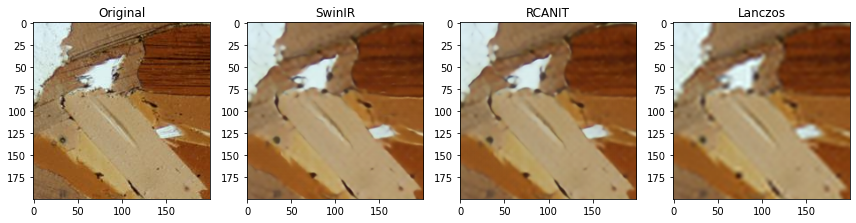

In [12]:
original_image = Image.open("original/2100.png")
rcanit_image = Image.open("rcanit_4x/2100.png")
swinir_image = Image.open("swinir_4x/2100.png")
lanczos_image = Image.open("lanczos_4x/2100.png")




def graphImgs(imgs, title=None, cmap="Greys_r", figsize=(12,6)):
    """ imgs ->  a list of images
        title ->  a list of strings        
        returns mpl subplots
    """
    plt.figure(figsize=(20,15))
    fig, axes = plt.subplots(nrows=1, ncols=len(imgs), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(imgs[i], cmap=cmap)
        if title is not None:
            try:
                ax.set_title(title[i])
            except:
                pass
    fig.tight_layout()

graphImgs([np.array(original_image)[:200,200:400,:],  np.array(swinir_image)[:200, 200:400,:], np.array(rcanit_image)[:200, 200:400,:], np.array(lanczos_image)[:200, 200:400,:]], ["Original","SwinIR","RCANIT",  "Lanczos"])

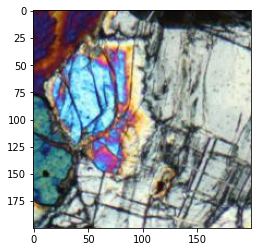

In [8]:
plt.imshow(np.array(original_image)[:200,200:400,:])

In [145]:
folderA = "original/"
folderB = "bicubic_4x/"
# 3. Load the two input images

scores = []
for i in os.listdir(folderA):
    imageA = cv2.imread(folderA+i)
    imageB = cv2.imread(folderB+i)

    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # 6. You can print only the score if you want
    scores.append(score)
    #print("SSIM: {}".format(score))

print(np.mean(scores))

0.7079381311847367


In [25]:
folderA = "original/"
folderB = "rcanit_4x/"
# 3. Load the two input images

scores = []
for i in os.listdir(folderA):
    imageA = cv2.imread(folderA+i)
    imageB = cv2.imread(folderB+i)

    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # 6. You can print only the score if you want
    scores.append(score)
    #print("SSIM: {}".format(score))

print(np.mean(scores))

0.7703456050324604


In [26]:
folderA = "original/"
folderB = "swinir_4x/"
# 3. Load the two input images

scores = []
for i in os.listdir(folderA):
    imageA = cv2.imread(folderA+i)
    imageB = cv2.imread(folderB+i)

    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # 6. You can print only the score if you want
    scores.append(score)
    #print("SSIM: {}".format(score))

print(np.mean(scores))

0.7777658107760879
